In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [3]:
### Imports
import string
import re 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [6]:
import seaborn as sns

# Data exploration

In [4]:
pd.set_option("display.max_rows", None)

In [5]:
df = pd.read_json('../raw_data/df_with_age_gender.json')
df.head()

,full_transcript,artist,show_name,year,source,artist_birthday,artist_gender,age_then
0,[rock music playing]\n\n[indistinct chatter]\n...,Adam Devine,Best Time Of Our Lives,2019.0,Scraps from the Loft,1983.0,2,36.0
1,"strong language. CHEERING Yes, yes, yes! How...",Adam Hess,Live from the BBC,2016.0,BBC,1990.0,2,26.0
2,"Ladies and gentlemen, please welcome your hos...",Adam Hills,Live at the Apollo Series 9 Episode 4,2013.0,BBC,1970.0,2,43.0
3,some strong language and adult humour Ladies...,Adam Hills,Live at the Apollo Series 12 Episode 4,2016.0,BBC,1970.0,2,46.0
4,"Adam Hills? CHEERING Hello, Apollo. I am going...",Adam Hills,Live at the Apollo Series 5 Episode 5,2009.0,BBC,1970.0,2,39.0


In [6]:
print(df['full_transcript'].iloc[42])

Recorded on July 1, 2009 at The Brentwood Theatre in Los Angeles.

– Ladies and gentlemen, please welcome Aziz Ansari! – Thank you. Thank you. Thank you. Thank you. Thank you. Thank you. Thank you. Thank you. Whoa, whoa. Oh, wow. Thank you. Thank you. Thank you so much. Thank you. Thank you. Thank you. Thank you. That’s so nice of you guys. Thank you.

“Gay Rights”
I recently moved to Los Angeles and, you know, a big issue here and everywhere in the country right now is gay rights. And I was walking down the street once, and this guy came up to me with a clipboard. And he goes, “hey, man. Do you have a moment for gay rights?” and I went, “sorry, man. I’m in a little bit of a rush.” and then that dude watched me walk into a Jamba Juice. And he was a little upset. He was like, “really, man? “you’re in a rush to get to Jamba Juice? I’m out here trying to make a difference.” and I was like, “well, actually, man, “there’s a guy that works in that Jamba Juice “that said some really hateful s

## distribution

### Gender

<AxesSubplot:xlabel='artist_gender', ylabel='Count'>

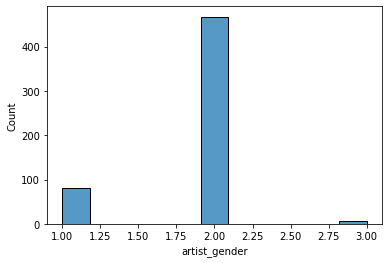

In [7]:
sns.histplot(data=df, x="artist_gender")

In [38]:
df.groupby(['artist_gender']).count()

,full_transcript,artist,show_name,year,source,artist_birthday,age_then
artist_gender,,,,,,,
1,82,82,82,82,82,82,82
2,467,467,467,464,467,466,463
3,6,6,6,6,6,6,6


Graph 1: Gender of unique comedians:

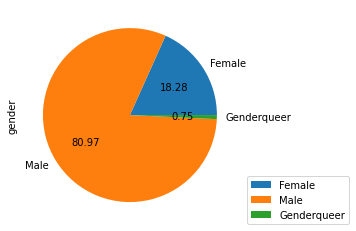

In [49]:
df.groupby(['artist_gender']).nunique()['artist'].rename(
    index={1: 'Female', 2: 'Male', 3: 'Genderqueer'}).plot(
    kind='pie', label ='gender', autopct='%.2f')
plt.legend(loc=(1.04,0))

Graph 2: Gender of all comedian-show

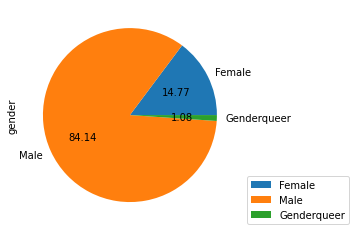

In [44]:
df.groupby(['artist_gender']).size().rename(
    index={1: 'Female', 2: 'Male', 3: 'Genderqueer'}).plot(
    kind='pie', label ='gender', autopct='%.2f')
plt.legend(loc=(1.04,0))

### Year of performance

In [55]:
df.groupby(['year']).size()

year
1963.0     1
1965.0     2
1971.0     1
1972.0     1
1975.0     1
1976.0     1
1977.0     1
1978.0     1
1979.0     1
1982.0     1
1983.0     3
1984.0     1
1986.0     1
1987.0     1
1988.0     1
1990.0     1
1991.0     2
1992.0     1
1993.0     4
1994.0     2
1996.0     4
1997.0     1
1998.0     3
1999.0     6
2000.0     2
2001.0     2
2002.0     1
2003.0     2
2004.0     6
2005.0     2
2006.0     8
2007.0     8
2008.0     9
2009.0    21
2010.0    32
2011.0    33
2012.0    37
2013.0    34
2014.0    34
2015.0    45
2016.0    59
2017.0    55
2018.0    42
2019.0    38
2020.0    31
2021.0     9
dtype: int64

Graph 1: Number of shows per year

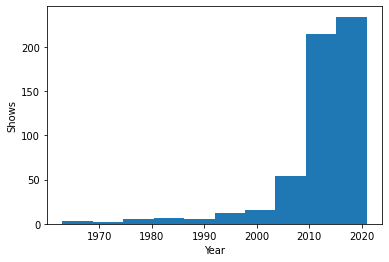

In [106]:
plt.hist(df['year'])
plt.xlabel('Year')
plt.ylabel('Shows');

Graph 2: Number of shows grouped by decades

In [74]:
decade_df = df.groupby((df.year//10)*10)['full_transcript'].count().reset_index()
decade_df

,year,full_transcript
0,1960.0,3
1,1970.0,7
2,1980.0,8
3,1990.0,24
4,2000.0,61
5,2010.0,409
6,2020.0,40


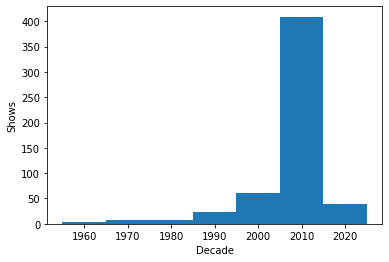

In [99]:
x = decade_df['year']
y = decade_df['full_transcript']

plt.bar(x, y, width=10)
plt.xlabel('Decade')
plt.ylabel('Shows');

### Age of comedians

In [105]:
df['age_then'].mean()

40.55535390199637

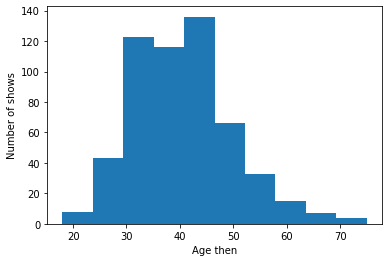

In [104]:
plt.hist(df['age_then'])
plt.xlabel('Age then')
plt.ylabel('Number of shows');